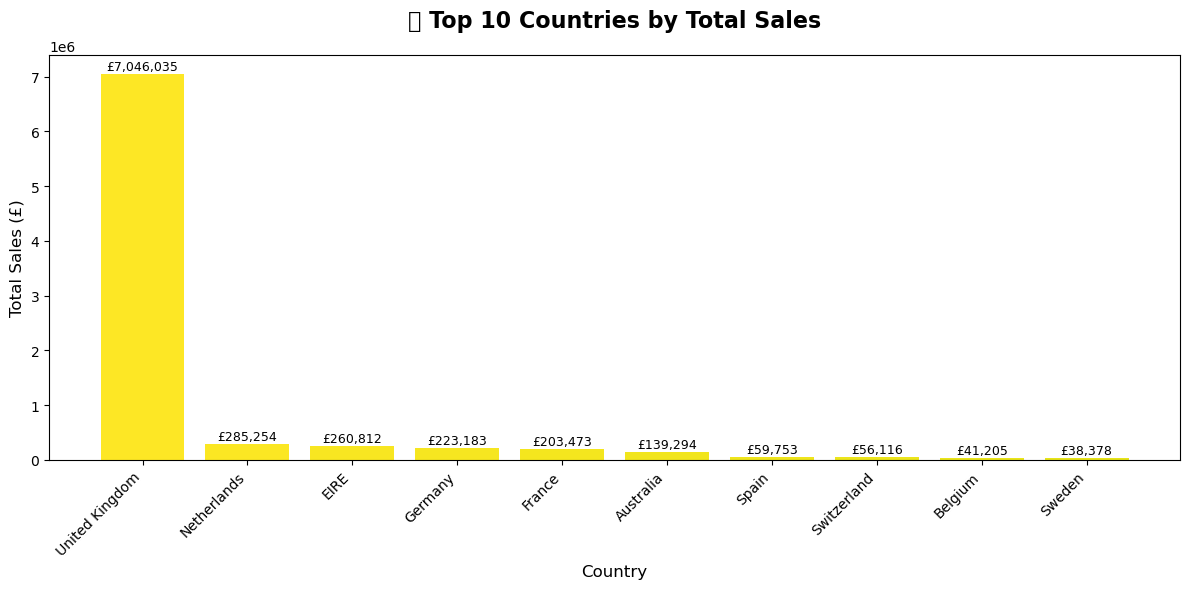

In [1]:
# top_countries_bar.py
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

conn = sqlite3.connect('retail_dw.db')
query = """
SELECT 
    cd.Country,
    ROUND(SUM(sf.TotalSales), 2) AS TotalSales
FROM SalesFact sf
JOIN CustomerDim cd ON sf.CustomerID = cd.CustomerID
GROUP BY cd.Country
ORDER BY TotalSales DESC
LIMIT 10;
"""
df_country = pd.read_sql(query, conn)
conn.close()

# Plot
plt.figure(figsize=(12, 6))
bars = plt.bar(df_country['Country'], df_country['TotalSales'], 
               color=plt.cm.viridis_r(range(len(df_country))))

plt.title('🌍 Top 10 Countries by Total Sales', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total Sales (£)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Add value labels on bars
for i, (idx, row) in enumerate(df_country.iterrows()):
    plt.text(i, row['TotalSales'] + max(df_country['TotalSales'])*0.01,
             f"£{row['TotalSales']:,.0f}", 
             ha='center', fontsize=9, rotation=0)

plt.tight_layout()
plt.savefig('top_countries_bar.png', dpi=300, bbox_inches='tight')
plt.show();

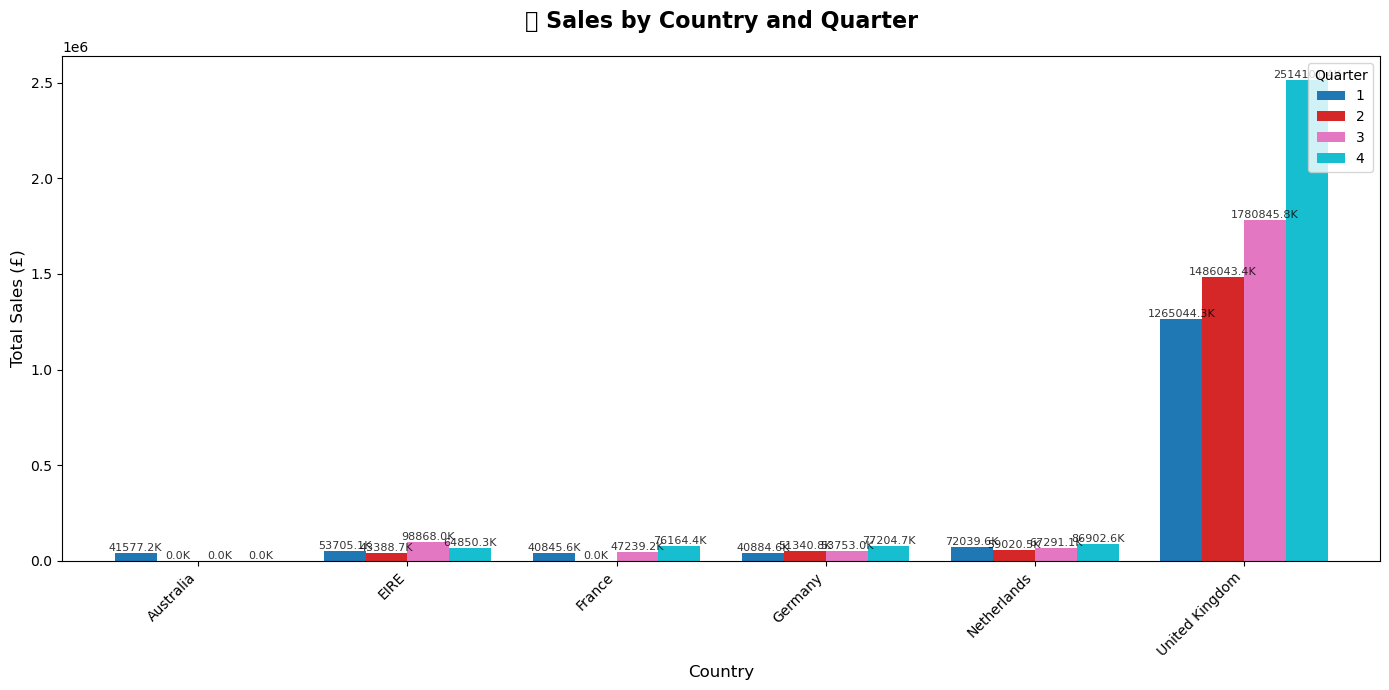

In [2]:
# sales_by_quarter.py
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

conn = sqlite3.connect('retail_dw.db')
query = """
SELECT 
    cd.Country,
    td.Quarter,
    ROUND(SUM(sf.TotalSales), 2) AS TotalSales
FROM SalesFact sf
JOIN CustomerDim cd ON sf.CustomerID = cd.CustomerID
JOIN TimeDim td ON sf.DateKey = td.DateKey
GROUP BY cd.Country, td.Quarter
ORDER BY TotalSales DESC
LIMIT 20;
"""
df_q = pd.read_sql(query, conn)
conn.close()

# Pivot
df_pivot = df_q.pivot(index='Country', columns='Quarter', values='TotalSales').fillna(0)

# Plot
ax = df_pivot.plot(kind='bar', figsize=(14, 7), colormap='tab10', width=0.8)
plt.title('📊 Sales by Country and Quarter', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total Sales (£)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Quarter', loc='upper right')

# Add value labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.1fK', fontsize=8, rotation=0, color='black', alpha=0.8)

plt.tight_layout()
plt.savefig('sales_by_quarter.png', dpi=300, bbox_inches='tight')
plt.show()

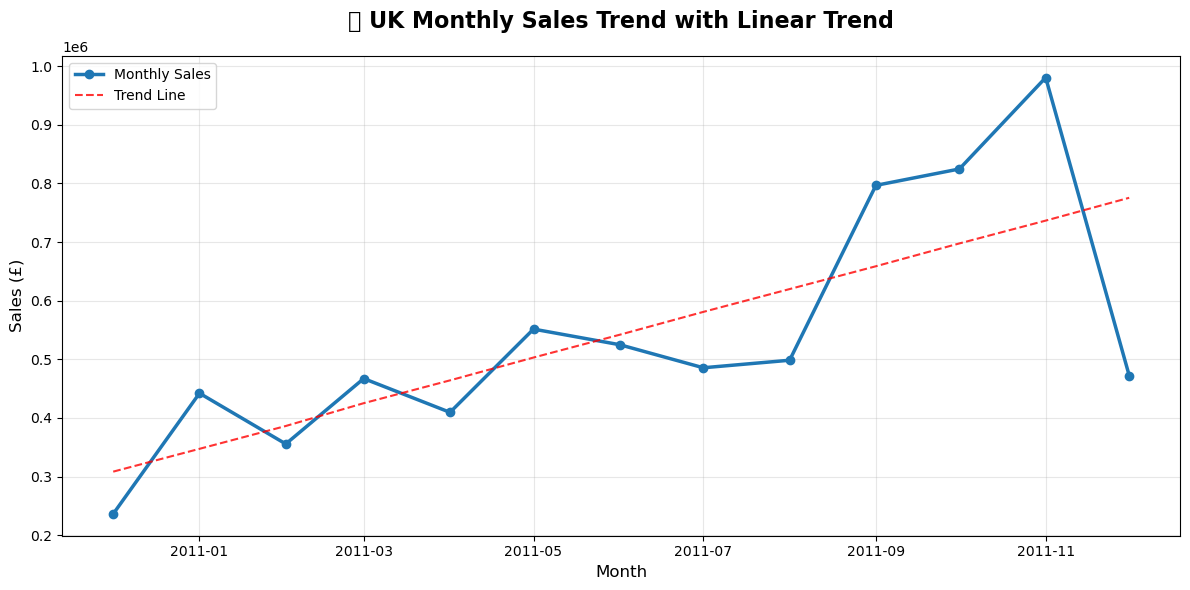

In [3]:
# monthly_sales_trend.py
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

conn = sqlite3.connect('retail_dw.db')
query = """
SELECT 
    td.Year,
    td.Month,
    SUM(sf.TotalSales) AS MonthlySales
FROM SalesFact sf
JOIN CustomerDim cd ON sf.CustomerID = cd.CustomerID
JOIN TimeDim td ON sf.DateKey = td.DateKey
WHERE cd.Country = 'United Kingdom'
GROUP BY td.Year, td.Month
ORDER BY td.Year, td.Month;
"""
df_trend = pd.read_sql(query, conn)
conn.close()

# Combine Year-Month for x-axis
df_trend['Period'] = df_trend['Year'].astype(str) + "-" + df_trend['Month'].astype(str).str.zfill(2)
df_trend['Period'] = pd.to_datetime(df_trend['Period'], format='%Y-%m')

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df_trend['Period'], df_trend['MonthlySales'], 
         marker='o', linewidth=2.5, color='#1f77b4', label='Monthly Sales')

# Add trend line
z = np.polyfit(range(len(df_trend)), df_trend['MonthlySales'], 1)
p = np.poly1d(z)
plt.plot(df_trend['Period'], p(range(len(df_trend))), 
         "--", color="red", alpha=0.8, label="Trend Line");

plt.title('📈 UK Monthly Sales Trend with Linear Trend', fontsize=16, fontweight='bold', pad=20);
plt.xlabel('Month', fontsize=12)
plt.ylabel('Sales (£)', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('monthly_sales_trend.png', dpi=300, bbox_inches='tight')
plt.show();